In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("carprice.csv")
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
set(data['carbody'])

{'convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'}

In [5]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [18]:
set(data['symboling'])
set(data['fueltype'])
set(data['aspiration'])
set(data['carbody'])
set(data['drivewheel'])
set(data['enginelocation'])
set(data['enginetype'])
set(data['cylindernumber'])
set(data['enginesize'])
set(p)

NameError: name 'p' is not defined

In [80]:
auto=data.iloc[:,1:]

In [81]:
auto=auto.drop('CarName',axis=1)

In [82]:
auto.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [24]:
auto.dropna()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,six,145,idi,3.01,3.40,23.0,106,4800,26,27


In [25]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [83]:
auto=auto.drop(['stroke','compressionratio','peakrpm',],axis=1)

In [84]:
fuels=pd.get_dummies(auto['fueltype'],drop_first=True)
aspi=pd.get_dummies(auto['aspiration'],drop_first=True)
door_num=pd.get_dummies(auto['doornumber'],drop_first=True)
car_b=pd.get_dummies(auto['carbody'],drop_first=False)
drive_wheel=pd.get_dummies(auto['drivewheel'],drop_first=False)
engine_loc=pd.get_dummies(auto['enginelocation'],drop_first=True)
engine_type=pd.get_dummies(auto['enginetype'],drop_first=False)
cylinder_num=pd.get_dummies(auto['cylindernumber'],drop_first=False)
fuel_system=pd.get_dummies(auto['fuelsystem'],drop_first=False)




In [85]:
auto=pd.concat([auto,fuels],axis=1)
auto=pd.concat([auto,aspi],axis=1)
auto=pd.concat([auto,door_num],axis=1)
auto=pd.concat([auto,car_b],axis=1)
auto=pd.concat([auto,drive_wheel],axis=1)
auto=pd.concat([auto,engine_loc],axis=1)
auto=pd.concat([auto,engine_type],axis=1)
auto=pd.concat([auto,cylinder_num],axis=1)
auto=pd.concat([auto,fuel_system],axis=1)

In [73]:
len(auto.columns)

56

C:\Users\puzan12\AppData\Local\Temp\ipykernel_5704\1015976458.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(auto.corr(),annot=True)


<Axes: >

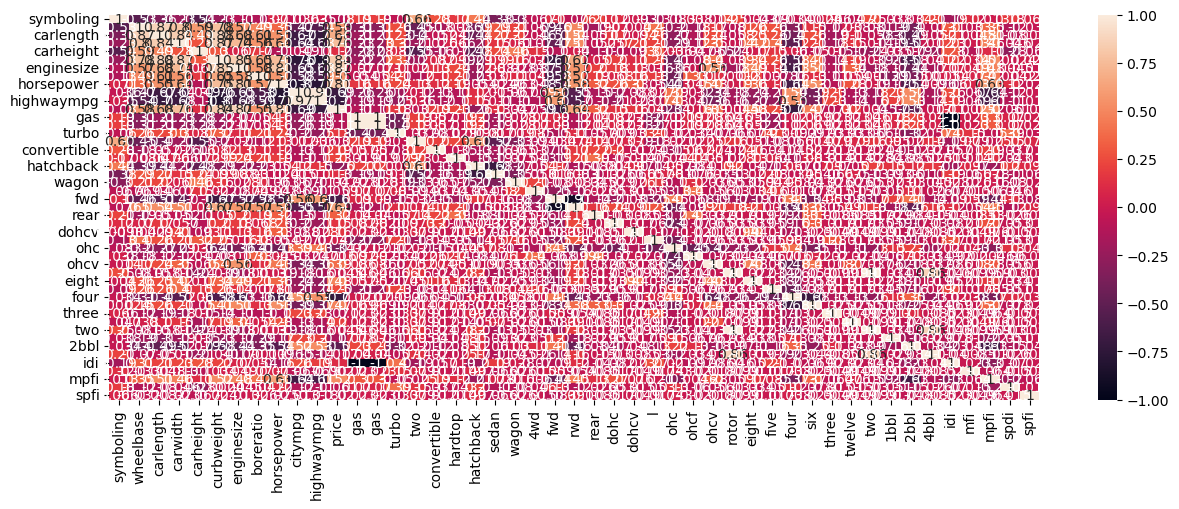

In [74]:
plt.figure(figsize=(15,5))
sns.heatmap(auto.corr(),annot=True)

In [86]:
auto=auto.drop(['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'],axis=1)

In [77]:
auto

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,154,19,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,102,24,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,115,18,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,114,23,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,160,19,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,134,18,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,106,26,...,0,0,0,0,0,1,0,0,0,0


In [78]:
len(auto.columns)

47

<Axes: >

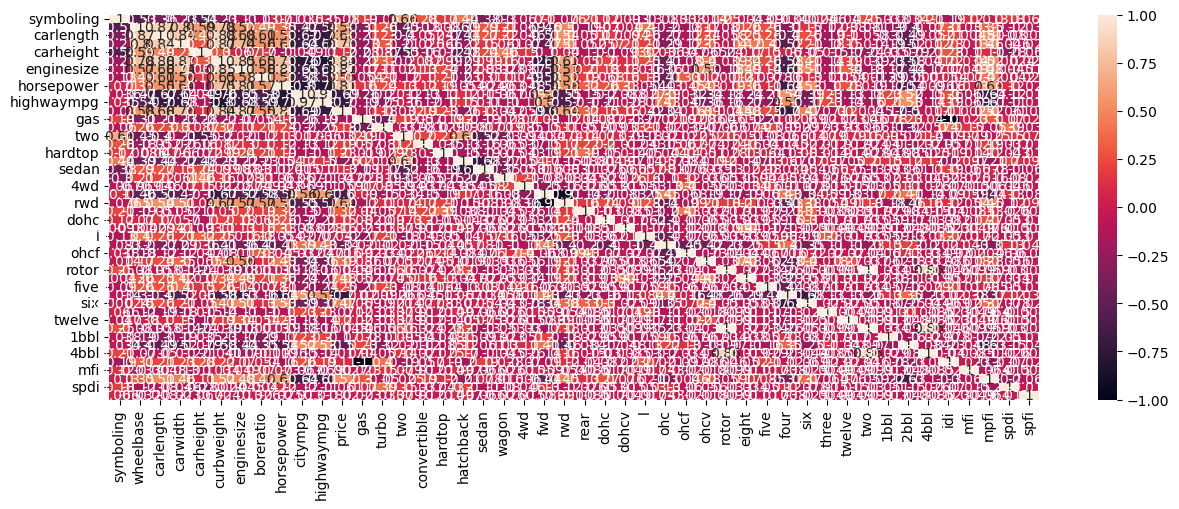

In [87]:
plt.figure(figsize=(15,5))
sns.heatmap(auto.corr(),annot=True)

In [89]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    205 non-null    int64  
 1   wheelbase    205 non-null    float64
 2   carlength    205 non-null    float64
 3   carwidth     205 non-null    float64
 4   carheight    205 non-null    float64
 5   curbweight   205 non-null    int64  
 6   enginesize   205 non-null    int64  
 7   boreratio    205 non-null    float64
 8   horsepower   205 non-null    int64  
 9   citympg      205 non-null    int64  
 10  highwaympg   205 non-null    int64  
 11  price        205 non-null    float64
 12  gas          205 non-null    uint8  
 13  turbo        205 non-null    uint8  
 14  two          205 non-null    uint8  
 15  convertible  205 non-null    uint8  
 16  hardtop      205 non-null    uint8  
 17  hatchback    205 non-null    uint8  
 18  sedan        205 non-null    uint8  
 19  wagon   

In [90]:
auto.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,0.070873,-0.035823,...,-0.047012,0.245950,-0.037911,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.353294,-0.470414,...,0.037803,-0.081174,-0.191073,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.552623,-0.670909,...,0.100413,-0.057877,-0.297330,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.640732,-0.642704,...,0.153516,-0.013699,-0.194078,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.108802,-0.048640,...,-0.170181,-0.238720,-0.035289,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.750739,-0.757414,...,0.187964,-0.039196,-0.233857,-0.577159,-0.040801,0.217275,0.034431,0.520220,-0.002434,0.024052
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.809769,-0.653658,...,0.335555,-0.184762,-0.169349,-0.442562,-0.166946,0.069594,0.049033,0.483520,0.004490,-0.013327
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,0.573677,-0.584532,...,0.054482,0.000127,-0.292226,-0.353342,0.000110,0.054451,0.070030,0.419335,-0.004213,0.025977
horsepower,0.070873,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,1.000000,-0.801456,...,0.280220,0.019250,-0.166432,-0.541966,-0.009630,-0.163926,0.072562,0.628372,0.117664,-0.025056
citympg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,-0.584532,-0.801456,1.000000,...,-0.131093,-0.183076,0.227497,0.520751,-0.153487,0.255963,-0.066724,-0.644489,-0.123954,-0.013083


In [94]:
auto=auto.drop(['symboling'],axis=1)

In [97]:
auto.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'price', 'gas', 'turbo', 'convertible', 'hardtop', 'hatchback', 'sedan',
       'wagon', '4wd', 'fwd', 'rwd', 'rear', 'dohc', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'eight', 'five', 'four', 'six', 'three',
       'twelve', '1bbl', '2bbl', '4bbl', 'idi', 'mpfi', 'spdi'],
      dtype='object')

In [96]:
df_train,df_test=train_test_split(auto,test_size=0.3,random_state=20)

In [104]:
x_train=df_train.drop('price',axis=1)
y_train=df_train[['price']]

In [102]:
len(x_train.columns)

40

In [103]:
len(df_train.columns)

41

In [106]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [107]:
x_test=df_test.drop("price",axis=1)
y_test=df_test[['price']]

In [116]:
pred_data=x_test.iloc[14:15:]

In [117]:
pred_data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,four,six,three,twelve,1bbl,2bbl,4bbl,idi,mpfi,spdi
140,93.3,157.3,63.8,55.7,2240,108,3.62,73,26,31,...,1,0,0,0,0,1,0,0,0,0


In [140]:
pr=regressor.predict(pred_data)[0][0]

In [148]:
real=y_test.iloc[14:15].values[0][0]

In [149]:

print("realprice",real,"predicted price:",pr)

realprice 7603.0 predicted price: 6799.776722456809


In [150]:
from sklearn.metrics import r2_score
av=r2_score(y_test,regressor.predict(x_test))

In [151]:
av

0.5595917555291694

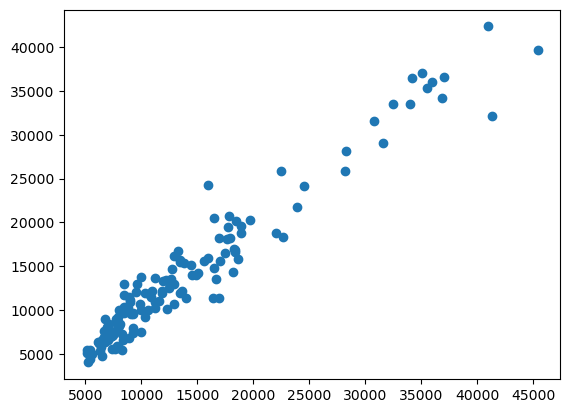

In [153]:
plt.scatter(y_train,regressor.predict(x_train))

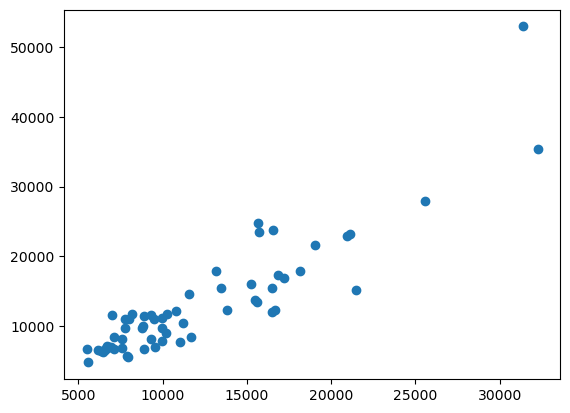

In [154]:
plt.scatter(y_test,regressor.predict(x_test))